# Applying a Random Forest model for regression

In [1]:
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading the logaritmic dataset

In [2]:
DATA = pd.read_csv("Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_pctWSocSec,log_perCapInc,log_PctEmplProfServ,log_FemalePctDiv,log_NumImmig,log_PctImmigRec10,log_PctPersOwnOccup,log_PctHousLess3BR,log_OwnOccLowQuart,log_PctSameCity85,log_PctSameState85,log_LandArea,log_PopDens,log_PctUsePubTrans,log_ViolentCrimesPerPop
0,0.110590,0.146128,0.149219,0.243038,0.012837,0.143015,0.190332,0.178977,0.086360,0.178977,0.214844,0.049218,0.100371,0.079181,0.079181
1,0.096910,0.136721,0.060698,0.281033,0.004321,0.212188,0.100371,0.260071,0.082785,0.204120,0.181844,0.008600,0.049218,0.161368,0.222716
2,0.139879,0.103804,0.110590,0.232996,0.000000,0.075547,0.152288,0.178977,0.071882,0.222716,0.193125,0.004321,0.082785,0.008600,0.155336
3,0.133539,0.133539,0.161368,0.173186,0.008600,0.117271,0.287802,0.004321,0.093422,0.214844,0.217484,0.008600,0.143015,0.107210,0.049218
4,0.158362,0.155336,0.139879,0.079181,0.000000,0.103804,0.276462,0.075547,0.117271,0.206826,0.184691,0.017033,0.037426,0.008600,0.012837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.113943,0.173186,0.225309,0.201397,0.004321,0.167317,0.190332,0.173186,0.079181,0.170262,0.143015,0.004321,0.107210,0.021189,0.037426
1990,0.100371,0.071882,0.149219,0.193125,0.021189,0.222716,0.049218,0.204120,0.133539,0.041393,0.000000,0.008600,0.136721,0.079181,0.161368
1991,0.198657,0.117271,0.146128,0.176091,0.025306,0.100371,0.139879,0.220108,0.123852,0.252853,0.245513,0.033424,0.120574,0.071882,0.089905
1992,0.152288,0.146128,0.195900,0.113943,0.025306,0.173186,0.143015,0.214844,0.187521,0.201397,0.181844,0.012837,0.139879,0.123852,0.075547


## Creating test and train sets for model fitting

In [3]:
X = DATA.drop(["log_ViolentCrimesPerPop"],axis=1).copy()
Y = DATA.log_ViolentCrimesPerPop

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)
X_train.size, X_test.size

(19530, 8386)

## Defining the optimum Random Forest Regressor
The optimization will be made by changing the number of samples per Split and Leaf and the number of Decision Trees to evaluate as estimators.

In [4]:
Results_Nums_SplitLeaf = []
MinR2 = 0.0
Range_Leaf_Split = range(1, 21)
Range_Estimators = range(10, 101, 10)

ProgressBar = tqdm(total = (len(Range_Leaf_Split)**2)*len(Range_Estimators))

for NumEstim in Range_Estimators:
    for numSplit in Range_Leaf_Split:
        for numLeaf in Range_Leaf_Split:
            RF_Regressor = RandomForestRegressor(n_estimators=NumEstim, min_samples_split=numSplit,
                                                     min_samples_leaf=numLeaf, random_state = 42, n_jobs = -1)
            RF_Regressor.fit(X_train, Y_train)
            Y_hat = RF_Regressor.predict(X_test)
            R2_Score = r2_score(Y_test, Y_hat)

            ProgressBar.update(1)            
            if R2_Score > MinR2:
                MinR2 = R2_Score
                MinSampleSplit = numSplit
                MinSampleLeaf = numLeaf
                MinEstim = NumEstim

print(f"{MinEstim=}")
print(f"{MinSampleLeaf=}")
print(f"{MinSampleSplit=}")
print(f"{MinR2=}")

100%|██████████| 4000/4000 [18:27<00:00,  2.60it/s]

MinEstim=90
MinSampleLeaf=4
MinSampleSplit=1
MinR2=0.5635232209819581


## Using optimal number of samples for leafs and splits and number of estimators for Random Forest model

In [8]:
# Picking optimal values
MinEstim = 90
MinSampleLeaf = 4
MinSampleSplit = 1

RF_Regressor = RandomForestRegressor(n_estimators=MinEstim, min_samples_split=MinSampleSplit,
                                    min_samples_leaf=MinSampleLeaf, random_state = 42, n_jobs = -1)
RF_Regressor.fit(X_train, Y_train)
Y_hat = RF_Regressor.predict(X_test)

## Obtaining scores for Random Forest model

In [9]:
MS2_E = mean_squared_error(Y_test, Y_hat, squared=False)
MA_E = mean_absolute_error(Y_test, Y_hat)
R2 = r2_score(Y_test, Y_hat)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.04704245463909751 
MA_E=0.03499880261244737 
R2=0.5635232209819581 


## Visualize Prediction-Error plot

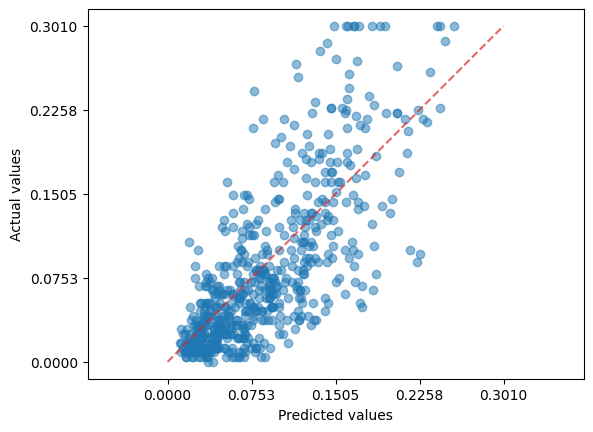

In [10]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_hat, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.5, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red"})